In [1]:
#importing modules
from data_API_downloader import DataPipeline, get_five_worst
from visualizer import VisualizerOfCriminalData
import matplotlib.pyplot as plt

In [2]:
#initializing the DataPipeline, notice that we do not need Downloader as we run it in the create_data = False regime which uses the data from data_in_polygons.csv that we used for our project
pipeline = DataPipeline(crime_data = None,create_data = False)

In [3]:
"""
User can pack this into one funcion call but our aim was to split it so that user can have more control over the desired output and can use only some steps.
It is important to exactly follow the order of the methods. The output table is already in the format that is prepared for visualizations and can analyzed further.
"""
pipeline.match_crime_data_to_polygons()
pipeline.compute_counts_per_polygon()
pipeline.preprocess_paq_data()
table = pipeline.merge_final_table()

In [4]:
#preview how the table should look
table.head(10)

KOD OKRES_KOD NUTS3_KOD SPR_OB_KOD  \
0  761      3503     CZ042     563102   
1  779      3504     CZ051     563510   
2  787      3504     CZ051     563820   
3  795      3504     CZ051     563871   
4  809      3505     CZ051     564028   
5  817      3505     CZ051     563889   
6  825      3506     CZ042     564567   
7  833      3506     CZ042     565229   
8  841      3506     CZ042     565555   
9  850      3507     CZ042     565971   

                                            geometry                 ORP  \
0  POLYGON ((13.43356 50.36894, 13.43005 50.36210...               Kadaň   
1  POLYGON ((15.15200 50.84060, 15.16443 50.84090...  Jablonec nad Nisou   
2  POLYGON ((15.23190 50.82697, 15.24458 50.82463...             Tanvald   
3  POLYGON ((15.32375 50.67244, 15.32655 50.66461...        Železný Brod   
4  POLYGON ((14.99442 50.86943, 15.00204 50.86884...            Frýdlant   
5  POLYGON ((15.11364 50.65194, 15.09614 50.64659...             Liberec   
6  POLYGON ((14.35136 50.65616, 14.35967 50.65060...          Litoměřice   
7  POLYGON ((14.10568 50.43401, 14.08354 50.43089...            Lovosice   
8  POLYGON ((14.36666 50.43187, 14.37205 50.41642...  Roudnice nad Labem   
9  MULTIPOLYGON (((13.62090 50.34256, 13.63651 50...               Louny   

   Lidé v exekuci (2021) [%]  Podíl lidí bez středního vzdělání (2021) [%]  \
0                       11.8                                          20.4   
1                        8.2                                          14.3   
2                        9.3                                          17.5   
3                        4.8                                          13.0   
4                       10.3                                          18.4   
5                        8.0                                          13.0   
6                        7.6                                          16.0   
7                        7.3                                          16.0   
8                        6.1                                          14.9   
9                        9.2                                          16.1   

   Domácnosti čerpající přídavek na živobytí (2020) [%]  \
0                                                9.9      
1                                                5.2      
2                                               12.9      
3                                                3.7      
4                                                6.8      
5                                                4.1      
6                                                4.2      
7                                                5.5      
8                                                3.6      
9                                                6.3      

   Propadání (průměr 2015–2021) [%]  Počet kriminálních aktivit per capita  \
0                               1.9                               0.040236   
1                               1.7                               0.057835   
2                               3.2                               0.046639   
3                               1.3                               0.017988   
4                               3.7                               0.051179   
5                               1.9                               0.062029   
6                               1.3                               0.035719   
7                               1.5                               0.030656   
8                               1.9                               0.041617   
9                               3.5                               0.038419   

   Criminality risk index  
0                   11.04  
1                    7.00  
2                   10.74  
3                    4.36  
4                    8.90  
5                    6.44  
6                    6.24  
7                    6.58  
8                    5.10  
9                    8.04

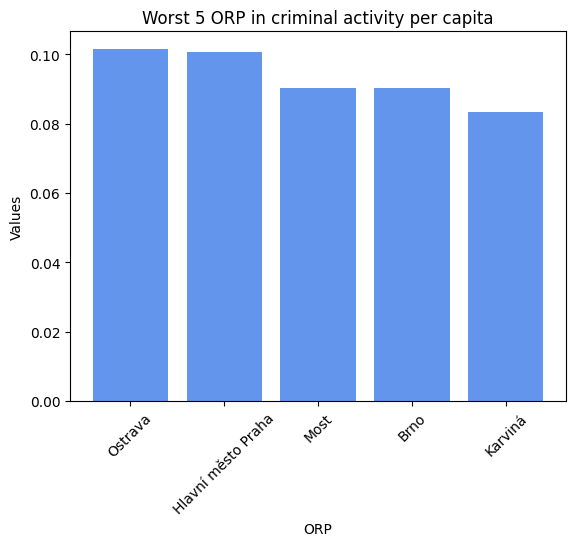

In [5]:
#Creating bar plots for each parameter so that we see the worst regions in the whole country
criminal_per_capita = get_five_worst(table,"Počet kriminálních aktivit per capita")
plt.bar(criminal_per_capita["ORP"],criminal_per_capita["Values"],color = "cornflowerblue")
plt.xlabel("ORP")
plt.xticks(rotation=45)
plt.ylabel("Values")
plt.title("Worst 5 ORP in criminal activity per capita")
plt.savefig('../Project_Report/Worst 5 ORP in criminal activity per capita.png')

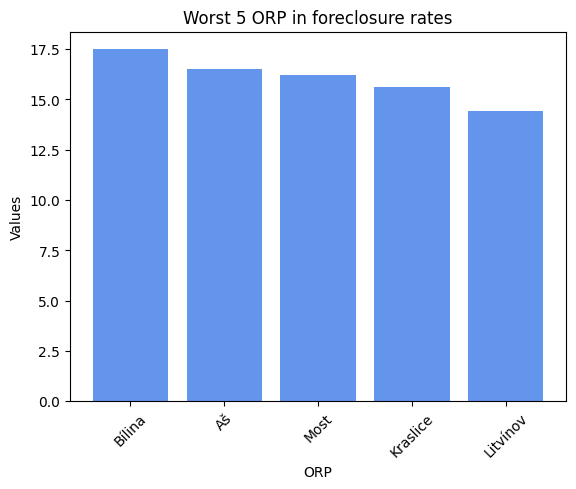

In [6]:
foreclosure = get_five_worst(table,"Lidé v exekuci (2021) [%]")
plt.bar(foreclosure["ORP"],foreclosure["Values"],color = "cornflowerblue")
plt.xlabel("ORP")
plt.xticks(rotation=45)
plt.ylabel("Values")
plt.title("Worst 5 ORP in foreclosure rates")
plt.savefig('../Project_Report/Worst 5 ORP in foreclosure rates.png')

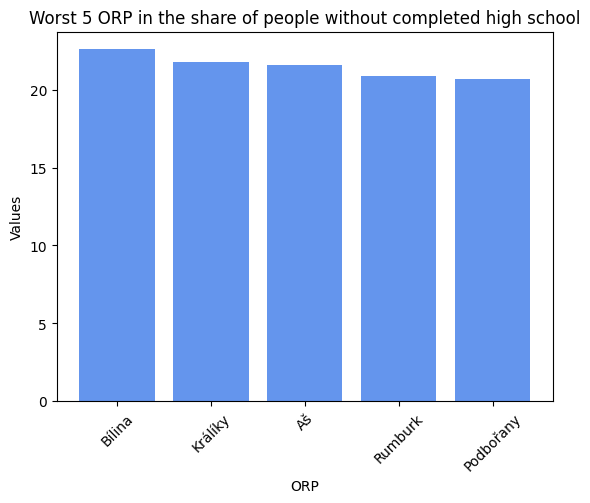

In [7]:
no_high_school = get_five_worst(table,"Podíl lidí bez středního vzdělání (2021) [%]")
plt.bar(no_high_school["ORP"],no_high_school["Values"],color = "cornflowerblue")
plt.xlabel("ORP")
plt.xticks(rotation=45)
plt.ylabel("Values")
plt.title("Worst 5 ORP in the share of people without completed high school")
plt.savefig('../Project_Report/Worst 5 ORP in the share of people without completed high school.png')

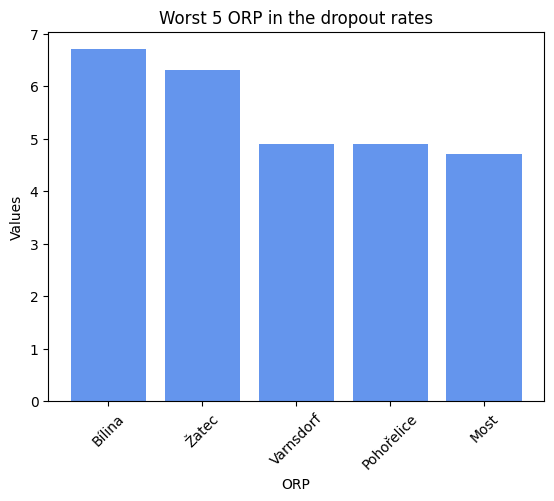

In [8]:
dropout = get_five_worst(table,"Propadání (průměr 2015–2021) [%]")
plt.bar(dropout["ORP"],dropout["Values"],color = "cornflowerblue")
plt.xlabel("ORP")
plt.xticks(rotation=45)
plt.ylabel("Values")
plt.title("Worst 5 ORP in the dropout rates")
plt.savefig('../Project_Report/Worst 5 ORP in the dropout rates.png')

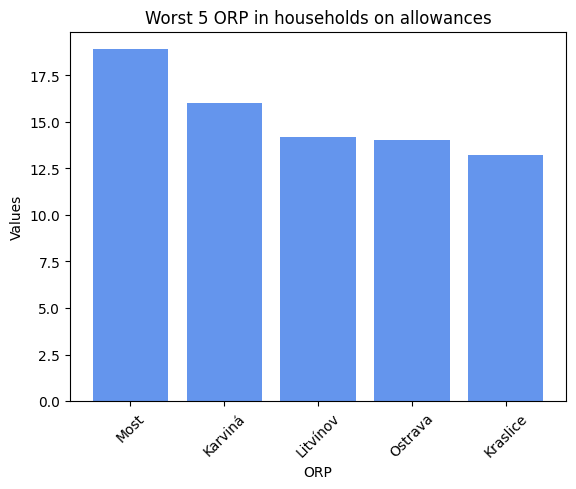

In [9]:
allowances = get_five_worst(table,"Domácnosti čerpající přídavek na živobytí (2020) [%]")
plt.bar(allowances["ORP"],allowances["Values"],color = "cornflowerblue")
plt.xlabel("ORP")
plt.xticks(rotation=45)
plt.ylabel("Values")
plt.title("Worst 5 ORP in households on allowances")
plt.savefig('../Project_Report/Worst 5 ORP in households on allowances.png')

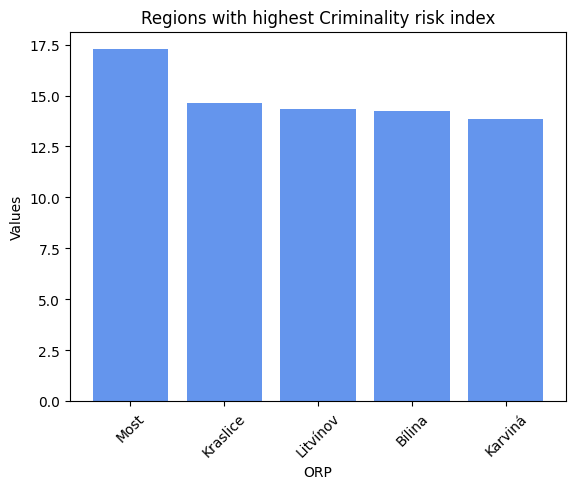

In [10]:
risk = get_five_worst(table,"Criminality risk index")
plt.bar(risk["ORP"],risk["Values"],color = "cornflowerblue")
plt.xlabel("ORP")
plt.xticks(rotation=45)
plt.ylabel("Values")
plt.title("Regions with highest Criminality risk index")
plt.savefig('../Project_Report/Regions with highest Criminality risk index.png')

In [11]:
#initializing VisualizerOfCriminalData to use it
visualizer = VisualizerOfCriminalData(table)

In [12]:
#getting the maps to be displayed with their english names
maps = visualizer.get_folium_maps()
labels = visualizer.english_legend_name_buffer

In [13]:
print(labels[0])
maps[0]

Criminality per capita


In [14]:
print(labels[1])
maps[1]

People in foreclosure (2021) [%]


In [15]:
print(labels[2])
maps[2]

Dropout (average 2015–2021) [%]


In [16]:
print(labels[3])
maps[3]

Share of people without completed high school (2021) [%]


In [17]:
print(labels[4])
maps[4]

Households on allowances (2020) [%]


In [18]:
print(labels[5])
maps[5]

Criminality risk index


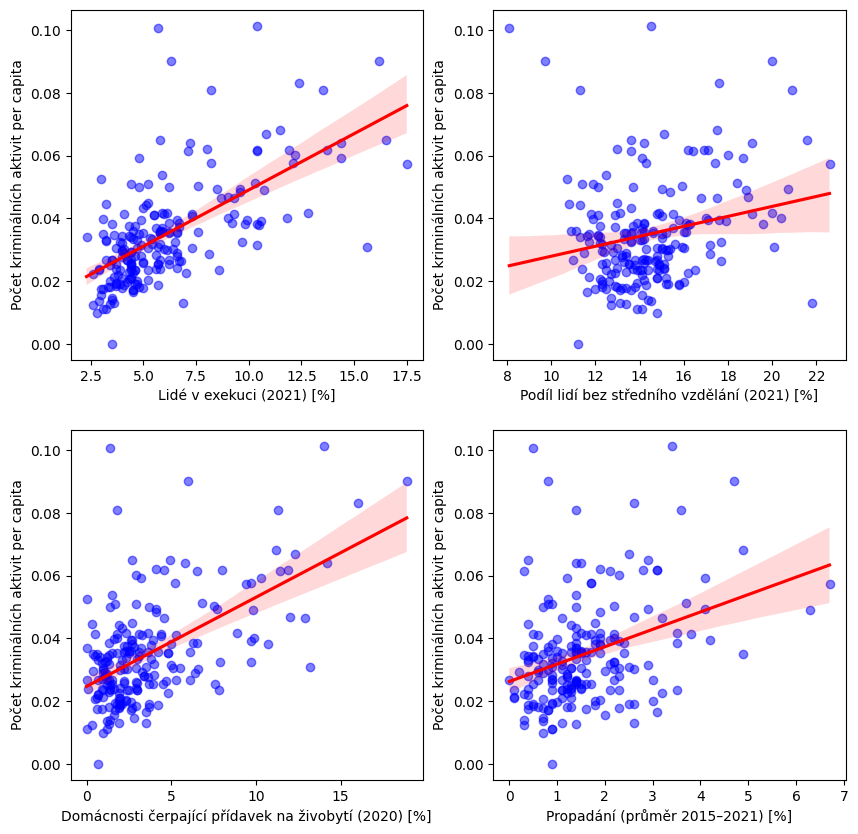

In [19]:
#scatter plots of how correlated are the variables
visualizer.show_scatter_correlations()

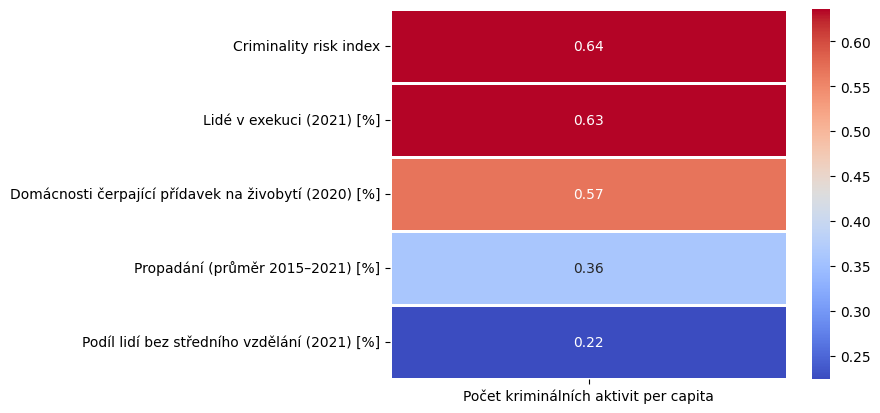

In [20]:
#correlation heatmap including the index
visualizer.show_correlation_heatmap()